In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [3]:
train = pd.read_csv('./data/train.csv')

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,6304.000000,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,...,6303.000000,6303.000000,6303.000000,6303.0,6303.0,6303.0,6303.0,6303.0,6303.0,6303.0
mean,4.440355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.139616,0.142313,0.026971,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.885613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.100344,5.531528,1.675680,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,130.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
train.fillna(0, inplace = True)

In [10]:
y = train['label']
X = train.drop('label', axis = 1)

In [15]:
def show_images(num_images):
    '''
    This function plots the num_images provided of MNIST dataset.
    INPUT: num_images - int - The number of images you would like to view. 
            Mod 10 of num_images should be 0 and it should be fewer than 101 images.
    OUTPUT: A figure with the images shown for the training data.
    '''
    if num_images % 10 == 0 and num_images <= 100:
        for digit_num in range(0, num_images):
            plt.subplot(num_images // 10, 10, digit_num + 1) # create subplots
            mat_data = X.iloc[digit_num].values.reshape(28,28) #reshape images
            plt.imshow(mat_data) # plot the data 
            plt.xticks([]) # removes numbered labels on x-axis
            plt.yticks([]) # removes numbered labels on y-axis

    else:
        print("This is not the right input, please read the docstring before continuing.")
            

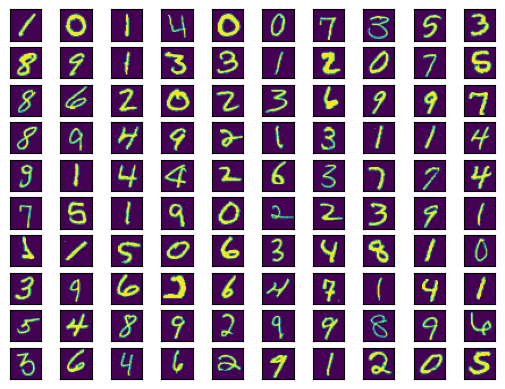

In [16]:
show_images(100)

In [23]:
 def show_images_by_digit(digit_to_see):
     '''
     This funciton plots the digits_to_see provided of MNIST dataset.

     INPUT: digits_to_see - int - A number between 0 and 9 of what you want to see. 
     OUTPUT: A figure with the images shown for the training data.
     '''
     if digit_to_see in list(range(10)):
         indices = np.where(y == digit_to_see) # pull indices for num of interest
         for digit_num in range(0, 50):
            plt.subplot(5,10, digit_num + 1) # create subplots
            mat_data = X.iloc[indices[0][digit_num]].values.reshape(28, 28) #reshape images
            plt.imshow(mat_data) # plot the data 
            plt.xticks([]) # removes numbered labels on x-axis
            plt.yticks([]) # removes numbered labels on y-axis

     else:
         print("This is not the right input, please read the docstring before continuing.")
             

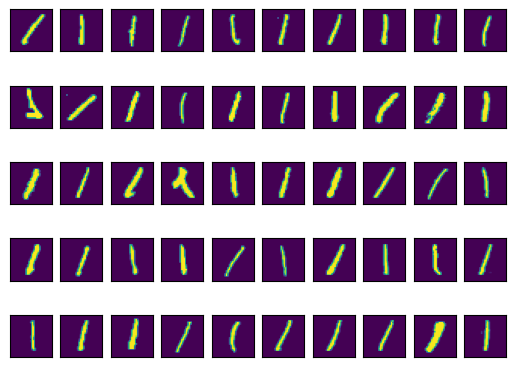

In [24]:
show_images_by_digit(1)

[[199   0   2   0   0   1   7   0   0   0]
 [  0 235   3   0   0   0   1   2   2   0]
 [  1   4 215   0   2   1   1   4   0   0]
 [  1   0   5 175   0   5   0   1   2   2]
 [  1   0   0   0 171   0   3   0   0   3]
 [  3   1   0   4   0 173   3   0   2   0]
 [  3   0   1   0   1   3 202   0   1   0]
 [  0   1   7   0   3   0   1 207   2   4]
 [  0   1   0   6   1   3   1   0 188   2]
 [  1   1   1   2  11   2   0   1   4 185]]
Axes(0.125,0.11;0.62x0.77)
0.937049495434887


0.937049495434887

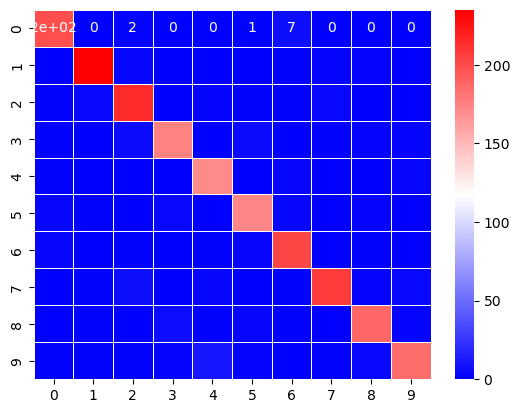

In [25]:
def fit_random_forest_classifier(X, y):
    '''
    INPUT: names are pretty self explanatory
    OUTPUT: none - prints the confusion matrix and accuracy
    '''
    # first, create training and testing data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

    classifier = RandomForestClassifier(n_estimators = 100, max_depth = None)

    classifier.fit(X_train, y_train)

    y_preds = classifier.predict(X_test)

    mat = confusion_matrix(y_test, y_preds)
    print(mat)
    print(sns.heatmap(mat, annot = True, cmap="bwr", linewidth=.5))
    acc = accuracy_score(y_test, y_preds)
    print(acc)
    return acc

fit_random_forest_classifier(X, y)
    

In [26]:
def do_pca(n_components, data):
    '''
    Transforms data using PCA to create n_components, and provides back the results of the 
    transformation.

    INPUT: n_components - int - the number of principal components to create data 
    the data you would like to transform 

    OUTPUT: pca - the pca object created after fitting the data 
    X_pca - the transformed X matrix with new number of components
    '''
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca

In [27]:
pca, X_pca = do_pca(2, X)

In [28]:
X_pca.shape

(6304, 2)

In [29]:
X.shape

(6304, 784)

[[110   0  41  10   8   5  25   0  10   0]
 [  0 207   0   3   2   7   4   6   9   5]
 [ 38   2  73  26  14  20  37   2  13   3]
 [ 12   2  31  19  24  30  25  16  20  12]
 [  4   4  18  22  49  15  18  12  12  24]
 [  8   8  31  25  17  26  27   4  30  10]
 [ 29   4  49  25  11  27  36   3  25   2]
 [  2   2   4  10  33   9   3  92   8  62]
 [  6   6  28  32  19  29  26   8  39   9]
 [  2  12   3  15  33   9   4  60  10  60]]
Axes(0.125,0.11;0.62x0.77)
0.34166266218164343


0.34166266218164343

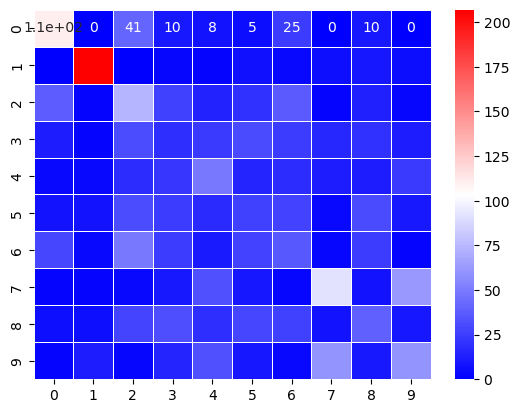

In [30]:
fit_random_forest_classifier(X_pca, y)

In [31]:
def plot_components(X, y):
    '''
    plots the data in a 2 dimensional space to view seperation 
    INPUT: straightforward again
    OUTPUT: None
    '''
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(10,6))
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.Set1(y[i]), fontdict={'size':15})

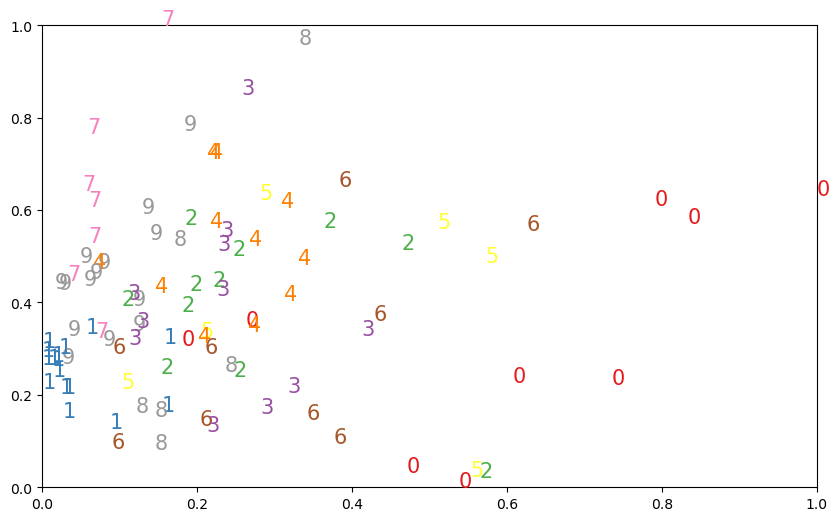

In [32]:
plot_components(X_pca[:100], y[:100])

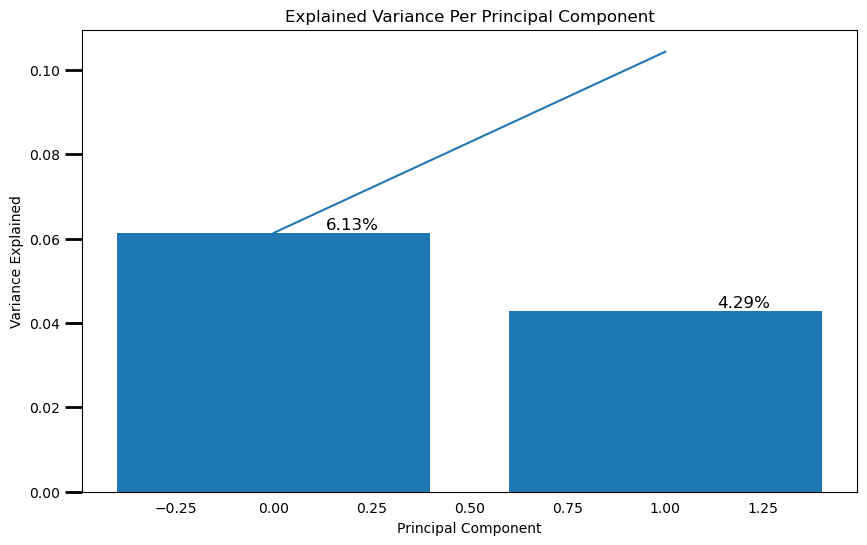

In [37]:
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components
    INPUT: pca - the result of instantian of PCA in scikit learn
    OUTPUT: None
    '''
    n_components = len(pca.explained_variance_ratio_)
    ind = np.arange(n_components)
    vals = pca.explained_variance_ratio_

    plt.figure(figsize=(10,6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(n_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i] + 0.2, vals[i]), va = "bottom", ha = "center", fontsize = 12)

    ax.xaxis.set_tick_params(width = 0)
    ax.yaxis.set_tick_params(width = 2, length = 12)

    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained")
    plt.title('Explained Variance Per Principal Component')

scree_plot(pca)